Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.

Objective: Use a deep convolutional neural network to perform facial recognition using Keras.

Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

Prerequisites:
Keras
Scikit Learn

Steps to be followed:
1. Input the required libraries

In [1]:

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import adam_v2
from keras.callbacks import TensorBoard
from keras import regularizers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



2. Load the dataset after loading the dataset, you have to normalize every image.

In [2]:
PATH = 'C:/Users/helen.ross/OneDrive/Documents/Training/PG AI and ML/04_Deep learning computer vision/ORL_faces.npz'


In [3]:


#load dataset
data = np.load(PATH) 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))



x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

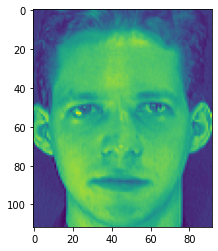

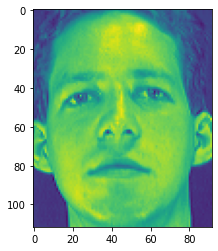

In [4]:


# check the images

image_train=x_train[0].reshape(112,92)
plt.imshow(image_train)
plt.show()

image_test=x_test[0].reshape(112,92)
plt.imshow(image_test)
plt.show()


In [5]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=222)

In [6]:
im_rows=112
im_cols=92
batch_size=32
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape[0]))



x_train shape: 228
x_test shape: 160


5. Build a CNN model that has 3 main layers:

i. Convolutional Layer

ii. Pooling Layer

iii. Fully Connected Layer

In [7]:
cnn= Sequential([
    Conv2D(
        filters=36, 
        kernel_size=7, 
        activation='relu', 
        input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    
    Conv2D(
        filters=54, 
        kernel_size=5, 
        activation='relu', 
        input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    
    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    
    Dense(1024, activation='relu'),
    Dropout(0.5),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_v2.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              50432000  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0

6. Train the model

In [9]:


history=cnn.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=100, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid))
)



Epoch 1/100
1/1 - 4s - loss: 3.0122 - accuracy: 0.0570 - val_loss: 3.1052 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 - 3s - loss: 3.1635 - accuracy: 0.0877 - val_loss: 3.0448 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 - 3s - loss: 3.0255 - accuracy: 0.0614 - val_loss: 3.0246 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 - 3s - loss: 2.9910 - accuracy: 0.0614 - val_loss: 3.0061 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 - 3s - loss: 2.9854 - accuracy: 0.0746 - val_loss: 3.0021 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 - 3s - loss: 2.9801 - accuracy: 0.0746 - val_loss: 3.0160 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 - 3s - loss: 2.9610 - accuracy: 0.0746 - val_loss: 3.0185 - val_accuracy: 0.0000e+00
Epoch 8/100
1/1 - 3s - loss: 2.9538 - accuracy: 0.0833 - val_loss: 3.0149 - val_accuracy: 0.0000e+00
Epoch 9/100
1/1 - 3s - loss: 2.9475 - accuracy: 0.0877 - val_loss: 2.9871 - val_accuracy: 0.0000e+00
Epoch 10/100
1/1 - 3s - loss: 2.9152 - accuracy: 0.1316 - val_loss: 2.9697 - val_accuracy: 

Epoch 85/100
1/1 - 3s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 5.8531e-04 - val_accuracy: 1.0000
Epoch 86/100
1/1 - 3s - loss: 7.7715e-04 - accuracy: 1.0000 - val_loss: 6.7046e-04 - val_accuracy: 1.0000
Epoch 87/100
1/1 - 3s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 8.8709e-04 - val_accuracy: 1.0000
Epoch 88/100
1/1 - 3s - loss: 6.3512e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 89/100
1/1 - 3s - loss: 0.0072 - accuracy: 0.9912 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 90/100
1/1 - 3s - loss: 3.1158e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 91/100
1/1 - 3s - loss: 5.1242e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 92/100
1/1 - 3s - loss: 0.0072 - accuracy: 0.9956 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 93/100
1/1 - 3s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 94/100
1/1 - 3s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy:

In [10]:


score = cnn.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test loss {:.4f}'.format(score[0]))
print('test accuracy {:.4f}'.format(score[1]))



test loss 0.5310
test accuracy 0.9312


7. Plot the result

In [11]:
def model_plot(history):
    # Plot the training and validation accuracy, and the loss
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','val'], loc='upper left')
    plt.show()
    plt.savefig('acc.png')
    plt.close()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','val'], loc='upper left')
    plt.savefig('loss.png')

    plt.show();

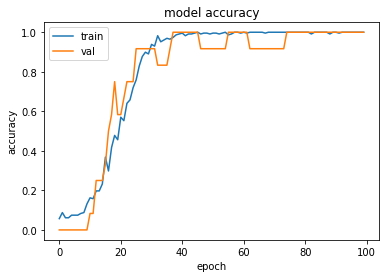

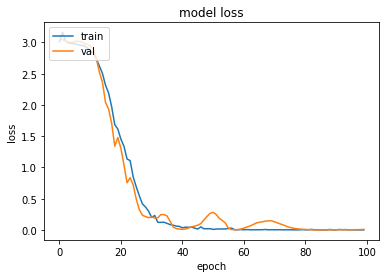

In [12]:
model_plot(history)